## Graphic utilities - multiple maps

AQUA is providing a simple tool to plot multiple maps to compare between.
This will generate a simple panel with the requested maps, by default represented as contour plots.
The colorbar is shared between all maps, and the color scale is set to the maximum and minimum values of all maps.
Many options are available to customize the appearance of the maps, such as the colormap, the contour levels, the title, the labels, etc (see the documentation of the `plot_maps` function for more details).

In [17]:
from aqua import Reader, plot_maps

In [18]:
reader = Reader(model="ERA5", exp="era5", source="monthly")
data = reader.retrieve(var='2t')
data

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 996, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    2t       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Dec 06 11:40:11 2023: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

As example we select 20 years of ERA5 data for 2t.
We plot in one panel the DJF mean, in another the JJA while in the last one the full year mean.The code will automatically detect vmin and vmax to share between figures and will also evaluate how many boxes are needed, so the user does not need to worry about it.

In [19]:
data_2000_2010 = data['2t'].sel(time=slice('2000', '2010'))

In [20]:
data_2000_2010_cycle = data_2000_2010.groupby('time.month').mean('time')
data_DJF = data_2000_2010_cycle.sel(month=[12, 1, 2]).mean('month')
data_JJA = data_2000_2010_cycle.sel(month=[6, 7, 8]).mean('month')
data_full = data_2000_2010.mean('time')

In [21]:
maps_list = [data_DJF, data_JJA, data_full]
titles = ['DJF', 'JJA', 'Full year']
title = 'ERA5 2m temperature 2000-2020'

Please consider that this plot due to the time averages will require 2-3 minutes on a login node.

2024-03-15 14:01:13 :: Multiple maps :: DEBUG    -> Creating a 2 x 2 grid
2024-03-15 14:01:13 :: Multiple maps :: DEBUG    -> Min value for the colorbar: 210
2024-03-15 14:01:13 :: Multiple maps :: DEBUG    -> Max value for the colorbar: 310
2024-03-15 14:01:13 :: Multiple maps :: DEBUG    -> Dropping unused axes 3
2024-03-15 14:01:13 :: Multiple maps :: INFO     -> Plotting map 0
2024-03-15 14:01:13 :: Multiple maps :: INFO     -> Loading data for map 0
2024-03-15 14:01:13 :: Multiple maps :: INFO     -> Adding cyclic longitude
/LUMI_TYKKY_Bv0AW20/miniconda/envs/env1/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
2024-03-15 14:01:16 :: Multiple maps :: DEBUG    -> Adding coastlines
2024-03-15 14:01:16 :: set_ticks :: DEBUG    -> Setting longitude ticks from -180 to 180
2024-03-15 14:01:16 :: set_ticks :: DEBUG    -> Setting longitude ticks to

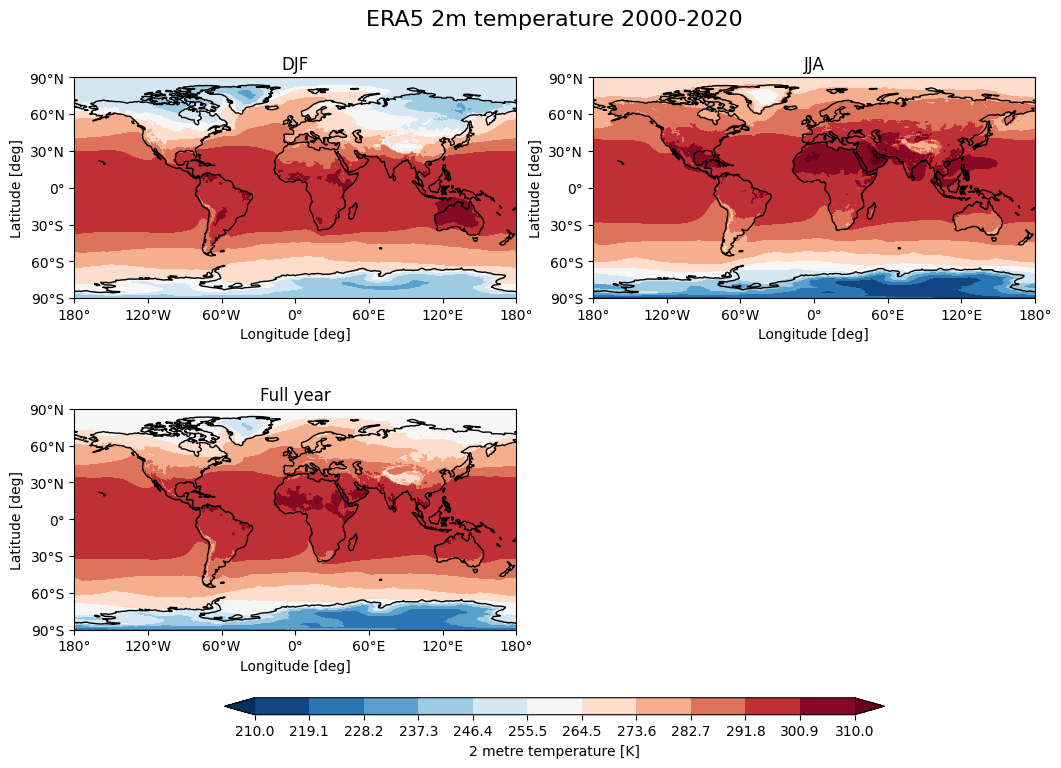

In [25]:
plot_maps(maps=maps_list, titles=titles, title=title, nlevels=11, loglevel='DEBUG',
          vmin=210, vmax=310)